## Primer Examen 15%

Juan esteban Ospina Holguín

C.C 1007374246

In [16]:
#Librerías
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
from scipy import optimize
plt.style.use("seaborn")

In [17]:
rut = 'https://github.com/restrepo/anomaly/raw/main/solutions.json.gz'#Se leen los datos
df = pd.read_json(rut)#se crea un Data Frame con los datos 
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [18]:
def maximo(x):
  "Esta función recibe una lista de números enteros, calcula el valor absoluto de los números y devuelve el mayor de estos"
  a = sorted(np.abs(x))#Lista de valores absolutos ordenados
  return a[-1] # retorna el valor máximo
df['smax'] = df['solution'].apply(maximo)#Se crea una nueva columna con los máximos absolutos de la columna solution
df['sum_s'] = df['solution'].apply(sum)#Se crea una nueva columna con la suma de los números dentro de las listas de la columna soluntion
df['sum_s^3'] = df['sum_s']**3#Se crea una nueva columna con el cubo de la lista sum_s
df

,l,k,solution,gcd,n,smax,sum_s,sum_s^3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [19]:
random.seed(1007374246) # se fija la semilla con número de cédula
coef = df.iloc[random.randint(0, 390073)]['solution']  # se obtiene la lista con un número aleatorio de 0 a 390073
p = np.polynomial.polynomial.Polynomial(coef[::-1])#se crea el polinomio
pprime = p.deriv()#derivada del polinomio
print('Polinomio p(x)=')
p

Polinomio p(x)=


Polynomial([-22.,  20.,  14.,  12.,  -8.,  -8.,  -8.,  -7.,   3.,   3.,   1.], domain=[-1,  1], window=[-1,  1])

In [20]:
print('Derivada dp(x)/dx =')
p.deriv()

Derivada dp(x)/dx =


Polynomial([ 20.,  28.,  36., -32., -40., -48., -49.,  24.,  27.,  10.], domain=[-1.,  1.], window=[-1.,  1.])

las raices del polinomio son x=-1.4777550788940563 x=0.7628669147766611 x=1.0  X=1.4390296786534624


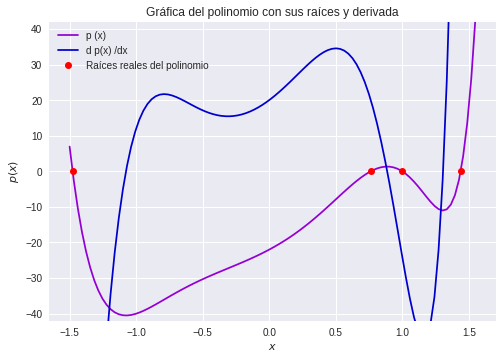

In [21]:
#se calculan las raices para el polinomio usando el método de la secante
root1=optimize.newton(p,-1.5)
root2=optimize.newton(p,0.5)
root3=optimize.newton(p,1)
root4=optimize.newton(p,1.5)

print("las raices del polinomio son x={} x={} x={}  X={}".format(root1,root2,root3,root4))#se muestran en pantalla las raíces
t = np.linspace(-1.5,1.55,100)#grilla de evaluación para el polinomio
plt.plot(t,p(t),color = 'darkviolet',label = 'p (x)') #se grafica el polinomio
plt.plot(t,pprime(t),color = 'mediumblue',label = 'd p(x) /dx')#se grafica la derivada del polinomio

plt.plot(root1,p(root1),'ro')#se grafican los puntos de las raices
plt.plot(root2,p(root2),'ro')
plt.plot(root3,p(root3),'ro')
plt.plot(root4,p(root4),'ro',label = 'Raíces reales del polinomio')
plt.ylabel('$p(x)$')#leyenda eje vertical
plt.xlabel('$x$')#leyenda eje horizontal
plt.ylim(-42,42)#Ajuste para visualización de la gráfica
plt.title('Gráfica del polinomio con sus raíces y derivada')#título de la gráfica
plt.legend();

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

número aleatorio =  5
p =  0.62482


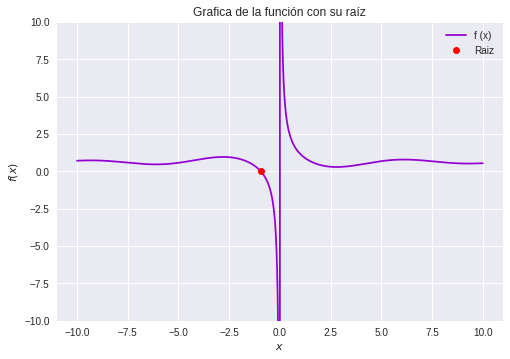

In [22]:
random.seed(1007374246) # se fija la semilla con número de cédula
print('número aleatorio = ',random.randint(1, 5))

p = round(random.uniform(0, 1),5)#se calcula un número aleatorio entre 0 y 1 para p
print('p = ',p)

def f(x):#Función #5
  return (np.cos(x)/x)+p

t = np.linspace(-10,10,10000)#grilla de evaluación [-10,10] con 10000 puntos
plt.plot(t,f(t),color = 'darkviolet',label = 'f (x)')#se grafica la función
Root1  = optimize.bisect( f, a=-2.5, b=-0.1) #Se encuentra la única raíz con el métod de la bisección 
plt.plot(Root1,f(Root1),'ro',label = 'Raiz')#se grafica el punto de la raíz
plt.ylabel('$f(x)$')#leyenda eje vertical
plt.xlabel('$x$')#leyenda eje horizontal
plt.title('Grafica de la función con su raíz')#título de la gráfica
plt.ylim(-10,10)#Ajuste para visualización de la gráfica
plt.legend();